<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/2_basic_mnist_code_with_data_augmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 66 images belonging to 4 classes.
Found 251 images belonging to 4 classes.


Epoch 1/10
1/1 [==============================] - 1s 881ms/step - loss: 1.5994 - accuracy: 0.4375 - val_loss: 3.3947 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 47ms/step - loss: 2.5457 - accuracy: 0.3750 - val_loss: 2.0143 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 35ms/step - loss: 1.6955 - accuracy: 0.4375 - val_loss: 1.4401 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 1.3081 - accuracy: 0.2500 - val_loss: 0.8366 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 53ms/step - loss: 0.5821 - accuracy: 0.8125 - val_loss: 1.1547 - val_accuracy: 0.5625
Epoch 6/10
1/1 [==============================] - 0s 36ms/step - loss: 0.7426 - accuracy: 0.6875 - val_loss: 0.5956 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 34ms/step - loss: 0.3586 - accuracy: 0.8125 - val_loss: 0.4085 - val_accuracy: 0.8750
Epoch 8/10
1/1 [==========

Epoch 1/10
1/1 [==============================] - 1s 816ms/step - loss: 1.5803 - accuracy: 0.1875 - val_loss: 2.0828 - val_accuracy: 0.4375
Epoch 2/10
1/1 [==============================] - 0s 54ms/step - loss: 1.9199 - accuracy: 0.5000 - val_loss: 1.4601 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 71ms/step - loss: 1.2265 - accuracy: 0.3125 - val_loss: 1.9264 - val_accuracy: 0.3750
Epoch 4/10
1/1 [==============================] - 0s 72ms/step - loss: 2.4578 - accuracy: 0.2500 - val_loss: 2.0994 - val_accuracy: 0.4375
Epoch 5/10
1/1 [==============================] - 0s 62ms/step - loss: 2.0354 - accuracy: 0.5000 - val_loss: 1.6897 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 1.1627 - accuracy: 0.6250 - val_loss: 0.4593 - val_accuracy: 0.8750
Epoch 7/10
1/1 [==============================] - 0s 50ms/step - loss: 0.2820 - accuracy: 0.9375 - val_loss: 0.7371 - val_accuracy: 0.7500
Epoch 8/10
1/1 [==========

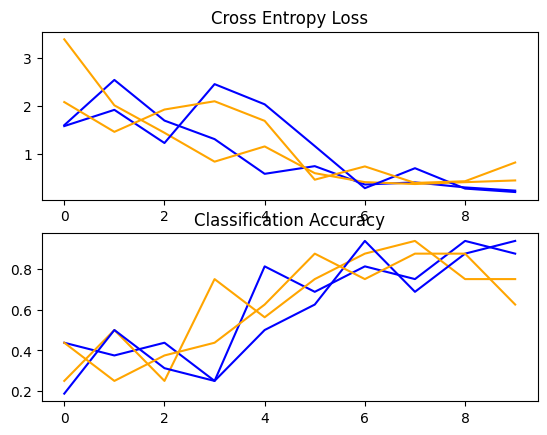

Accuracy: mean=68.750 std=6.250, n=2


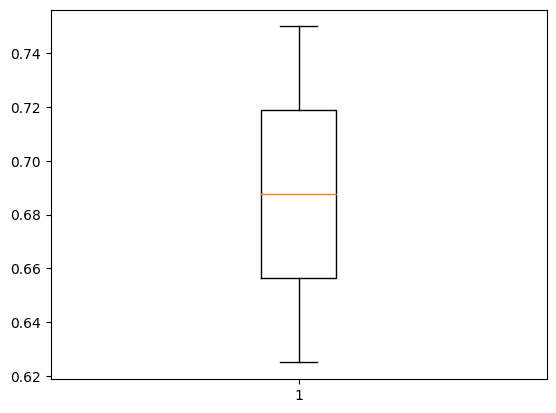

In [60]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
import numpy as np

# Load COVID-19 dataset
def load_dataset():
    train_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_dir = '/content/Covid/test'
    test_dir = '/content/Covid/train'

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, test_generator

# Define CNN model
def define_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))  # Update the number of units to num_classes
    opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model




# Define the cross-validation function

def train_and_evaluate_model(trainX, trainY, testX, testY, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=True)
    scores = []
    histories = []
    
    for train_ix, test_ix in kfold.split(trainX):
        model = define_model(num_classes)
        trainX_fold, trainY_fold = trainX[train_ix], trainY[train_ix]
        testX_fold, testY_fold = trainX[test_ix], trainY[test_ix]
        history = model.fit(trainX_fold, trainY_fold, epochs=10, batch_size=32, validation_data=(testX_fold, testY_fold), verbose=1)
        _, acc = model.evaluate(testX_fold, testY_fold, verbose=0)
        scores.append(acc)
        histories.append(history)
    
    return scores, histories


def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    pyplot.boxplot(scores)
    pyplot.show()


# Plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

# Summarize model performance
def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    pyplot.boxplot(scores)
    pyplot.show()

# Run the test harness for evaluating a model
def run_test_harness():
    train_generator, test_generator = load_dataset()
    
    trainX, trainY = train_generator.next()
    testX, testY = test_generator.next()

    num_classes = 4  # Update this with the actual number of classes in your dataset
    model = define_model(num_classes)


    scores, histories = train_and_evaluate_model(trainX, trainY, testX, testY, n_folds=2)

    summarize_diagnostics(histories)
    summarize_performance(scores)

# Entry point, run the test harness
run_test_harness()
